
<div style="background-color: darkblue; padding: 15px; border-radius: 5px;">
    <h2 style="text-align: left;">Kaggle Dogs vs. Cats Redux (Kernel Edition)
    </h2>
    <h2 style="text-align: left;">
    https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/overview</h2>
    <p style="text-align: left;"><strong>Notebook Author:</strong> Pedro Perez Alvarez</p>
    <p style="text-align: left;"><strong>Date:</strong> 3/2/2025</p>
</div>



<div style="background-color: purple; padding: 15px; border-radius: 5px;">
    <h2 style="text-align: left;">Introduction</h2>
    <p style="text-align: left;">
The goal of this assignment is to develop and analyze three different CNN models with varying hyperparameters to classify images of dogs and cats. The dataset used is from the 2013 Kaggle competition, Dogs vs. Cats.
    </p>
</div>


In [ ]:
# Mounts Google Drive to /content/drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikeras

<div style="background-color: white; padding: 15px; border-radius: 5px;color: black;">
    <h4 style="text-align: left;">Libraries load / Data load</h4>
    <p style="text-align: left;">
    </p>
</div>


In [ ]:
# Import Libraries
import os
import csv
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import logging
import tensorflow
import time
import warnings
from PIL import Image

import pathlib
from pathlib import Path
import re

from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2


import scikeras
from sklearn.utils.class_weight import compute_class_weight
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc,classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from tensorflow.keras.utils import Sequence

class PyDataset(Sequence):
    def __init__(self, data, labels, batch_size=32, **kwargs):
        super().__init__(**kwargs)  # ✅ Fix: Call parent class constructor
        self.data = data
        self.labels = labels
        self.batch_size = batch_size

    def __len__(self):
        return len(self.data) // self.batch_size

    def __getitem__(self, index):
        batch_data = self.data[index * self.batch_size: (index + 1) * self.batch_size]
        batch_labels = self.labels[index * self.batch_size: (index + 1) * self.batch_size]
        return batch_data, batch_labels



!unzip '/content/drive/My Drive/Colab Notebooks/train.zip' -d '/content'
!unzip '/content/drive/My Drive/Colab Notebooks/test.zip' -d '/content'

!mkdir train/{dog,cat}
!find train -maxdepth 1 -type f | grep 'dog' | xargs -I{} mv {} train/dog
!find train -maxdepth 1 -type f | grep 'cat' | xargs -I{} mv {} train/cat

!mkdir test/images
!find test -maxdepth 1 -type f | xargs -I{} mv {} test/images

train_dir = './train'
total_train = len(os.listdir('./train/dog')) + len(os.listdir('./train/cat'))
total_test = len(os.listdir('./test/images/'))

warnings.filterwarnings("ignore", category=FutureWarning)



Streaming output truncated to the last 5000 lines.
  inflating: /content/test/5499.jpg  
  inflating: /content/test/55.jpg    
  inflating: /content/test/550.jpg   
  inflating: /content/test/5500.jpg  
  inflating: /content/test/5501.jpg  
  inflating: /content/test/5502.jpg  
  inflating: /content/test/5503.jpg  
  inflating: /content/test/5504.jpg  
  inflating: /content/test/5505.jpg  
  inflating: /content/test/5506.jpg  
  inflating: /content/test/5507.jpg  
  inflating: /content/test/5508.jpg  
  inflating: /content/test/5509.jpg  
  inflating: /content/test/551.jpg   
  inflating: /content/test/5510.jpg  
  inflating: /content/test/5511.jpg  
  inflating: /content/test/5512.jpg  
  inflating: /content/test/5513.jpg  
  inflating: /content/test/5514.jpg  
  inflating: /content/test/5515.jpg  
  inflating: /content/test/5516.jpg  
  inflating: /content/test/5517.jpg  
  inflating: /content/test/5518.jpg  
  inflating: /content/test/5519.jpg  
  inflating: /content/test/552.jpg   

<div style="background-color: white; padding: 15px; border-radius: 5px;color: black;">
    <h4 style="text-align: left;">EDA of Initial Dataset</h4>
    <p style="text-align: left;"></p>
</div>

<div style="background-color: purple; padding: 15px; border-radius: 5px;">
    <h2 style="text-align: left;">Overview of Findings and Next Steps</h2>
    <p style="text-align: left;">
    </p>
</div>


<div style="background-color: white; padding: 15px; border-radius: 5px;color: black;">
    <h4 style="text-align: left;">Cleansing and Preprocessing</h4>
    <p style="text-align: left;">
    </p>
</div>


<div style="background-color: purple; padding: 15px; border-radius: 5px;">
    <h2 style="text-align: left;">Overview of Preprocessing</h2>
    <p style="text-align: left;">
    </p>
</div>

<div style="background-color: white; padding: 15px; border-radius: 5px;color: black;">
    <h4 style="text-align: left;">Feature Engineering</h4>
    <p style="text-align: left;">
    </p>
</div>

<div style="background-color: purple; padding: 15px; border-radius: 5px;">
    <h2 style="text-align: left;">Data Presentation</h2>
    <p style="text-align: left;">
        <a href="https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/overview/description" target="_blank" style="color: white; text-decoration: underline;">
        Per Kaggle Site
        </a>
        , data was used in a Kaggle competition to identify Dogs vs. Cats images. The train folder contains 25,000 images of dogs and cats. Each image in this folder has the label as part of the filename. The test folder contains 12,500 images, named according to a numeric id. For each image in the test set, you should predict a probability that the image is a dog (1 = dog, 0 = cat).
    </p>
</div>


In [ ]:
# Function plots images in the form of a grid with 1 row and 5 columns where

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))  # Creates 1x5 grid
    axes = axes.flatten()  # Flatten the axes for easier iteration

    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')

    plt.tight_layout()
    plt.show()


<div style="background-color: purple; padding: 15px; border-radius: 5px;">
    <h2 style="text-align: left;">CNN Models 1-3 </h2>
    <p style="text-align: left;">
    </p>
</div>

<div style="background-color: white; padding: 15px; border-radius: 5px;color: black;">
    <h4 style="text-align: left;"> Image Extraction</h4>
    <p style="text-align: left;">
    </p>
</div>

In [ ]:
# Extract Image File Paths
image_files = []
labels = []

for category, label in [('cat', 0), ('dog', 1)]:
    folder_path = os.path.join(train_dir, category)
    files = [os.path.join(folder_path, f) for f in os.listdir(folder_path)]
    image_files.extend(files)
    labels.extend([label] * len(files))

image_files = np.array(image_files)
labels = np.array(labels)



<div style="background-color: purple; padding: 15px; border-radius: 5px;">
    <h2 style="text-align: left;">CNN Model 1 - 30 Epochs</h2>
    <p style="text-align: left;">
    </p>
</div>

<div style="background-color: white; padding: 15px; border-radius: 5px;color: black;">
    <h4 style="text-align: left;"> Hyperparameters tuning and Image Normalization</h4>
    <p style="text-align: left;">
    </p>
</div>

In [ ]:
batch_size = 32
epochs = 30
filters = 32
kernel_size = (3, 3)
pool_size = (2, 2)
strides = (1, 1)
padding = 'same'
learning_rate = .0001
dropout_rate = .4

IMG_HEIGHT = 150
IMG_WIDTH = 150

<div style="background-color: white; padding: 15px; border-radius: 5px;color: black;">
    <h4 style="text-align: left;"> Splitting and Augmenting Data</h4>
    <p style="text-align: left;">
    </p>
</div>

In [ ]:
# Train-Validation Split (80-20%)

validation_split = 0.2

train_files, val_files, train_labels, val_labels = train_test_split(
    image_files, labels, test_size=validation_split, stratify=labels, random_state=42
)

# Image Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=10, width_shift_range=0.05,
    height_shift_range=0.05, shear_range=0, zoom_range=0.05,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_files.astype(str), 'class': train_labels.astype(str)}),
    x_col="filename", y_col="class", target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size, class_mode='binary'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': val_files.astype(str), 'class': val_labels.astype(str)}),
    x_col="filename", y_col="class", target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size, class_mode='binary', shuffle=False
)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [ ]:

# Define CNN Model
def create_model():
    model = tensorflow.keras.Sequential([
        tensorflow.keras.layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

        tensorflow.keras.layers.Conv2D(filters, kernel_size, strides=strides, activation='relu', padding = 'same', kernel_regularizer=l2(1e-5)),
        tensorflow.keras.layers.BatchNormalization(),
        tensorflow.keras.layers.MaxPooling2D(pool_size=pool_size),

        tensorflow.keras.layers.Conv2D(filters * 2, kernel_size, strides=strides, activation='relu', padding = 'same', kernel_regularizer=l2(1e-5)),
        tensorflow.keras.layers.BatchNormalization(),
        tensorflow.keras.layers.MaxPooling2D(pool_size=pool_size),

        tensorflow.keras.layers.Conv2D(filters * 4, kernel_size, strides=strides, activation='relu', padding = 'same', kernel_regularizer=l2(1e-5)),
        tensorflow.keras.layers.BatchNormalization(),
        tensorflow.keras.layers.MaxPooling2D(pool_size=pool_size),

        tensorflow.keras.layers.Flatten(),
        tensorflow.keras.layers.Dense(filters * 4, activation='relu'),
        tensorflow.keras.layers.Dropout(dropout_rate),

        tensorflow.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tensorflow.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

start_time = time.time()

# Train Initial Model
model = create_model()

early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

history = model.fit(
    train_generator, epochs=epochs, validation_data=val_generator,
    callbacks=[early_stop, lr_scheduler]
)

# Print Final Results
print("\n📊 Best Validation Accuracy:", max(history.history['val_accuracy']))

end_time = time.time()
print(f"SGD 2L 10N Processing Time: {end_time - start_time:.2f} seconds")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 185ms/step - accuracy: 0.6365 - loss: 0.7309 - val_accuracy: 0.7314 - val_loss: 0.5379 - learning_rate: 1.0000e-04
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 113s 181ms/step - accuracy: 0.7475 - loss: 0.5106 - val_accuracy: 0.7860 - val_loss: 0.4597 - learning_rate: 1.0000e-04
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 114s 182ms/step - accuracy: 0.7788 - loss: 0.4659 - val_accuracy: 0.8064 - val_loss: 0.4207 - learning_rate: 1.0000e-04
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 116s 185ms/step - accuracy: 0.7978 - loss: 0.4420 - val_accuracy: 0.7854 - val_loss: 0.4619 - learning_rate: 1.0000e-04
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 115s 184ms/step - accuracy: 0.8104 - loss: 0.4154 - val_accuracy: 0.8316 - val_loss: 0.3810 - learning_rate: 1.0000e-04
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 115s 183ms/step - accuracy: 0.8258 - loss: 0.3982 - val_accuracy: 0.8376 - val_loss: 0.3706 - learning_rate: 1.0000e-04
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 37, 37, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       5,308,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,207,557 (61.83 MB)

 Trainable params: 5,402,369 (20.61 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 10,804,740 (41.22 MB)

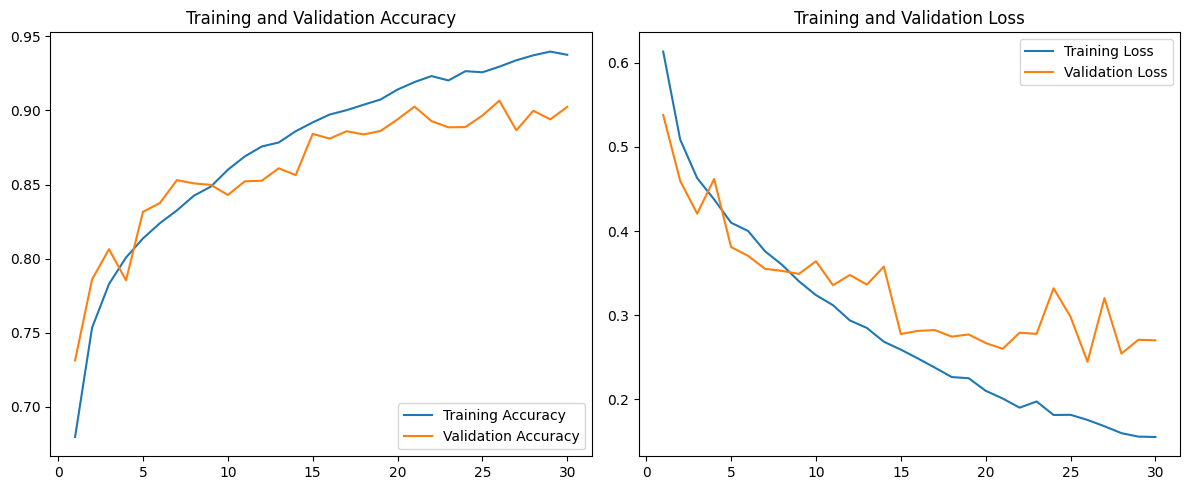

In [ ]:
# Extract metrics from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Determine how many epochs actually ran (e.g., if EarlyStopping halted early)
actual_epochs = len(acc)

# Create a matching range for the x-axis
epochs_range = range(1, actual_epochs + 1)

# Plot
plt.figure(figsize=(12, 5))

# Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()


157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step
Confusion Matrix:
[[2272  228]
 [ 239 2261]]
Classification Report:
              precision    recall  f1-score   support

         Cat       0.90      0.91      0.91      2500
         Dog       0.91      0.90      0.91      2500

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000



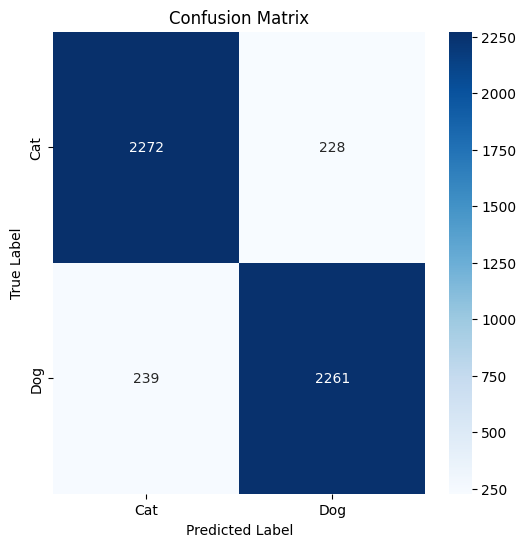

In [ ]:
# Reset the validation generator to ensure we start from the first batch
val_generator.reset()

# Generate predictions on the validation set
# For binary classification, predictions will be probabilities (e.g., between 0 and 1)
predictions = model.predict(val_generator, verbose=1)
# Convert probabilities to binary labels (0 or 1)
predictions_binary = (predictions > 0.5).astype(int).flatten()

# Get the true labels from the validation generator
# For flow_from_dataframe, the labels are stored in val_generator.labels
true_labels = val_generator.labels

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predictions_binary)
print("Confusion Matrix:")
print(cm)

# Print the classification report for precision, recall, and F1-score
report = classification_report(true_labels, predictions_binary, target_names=['Cat', 'Dog'])
print("Classification Report:")
print(report)

# Optional: Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step
AUC: 0.96719824


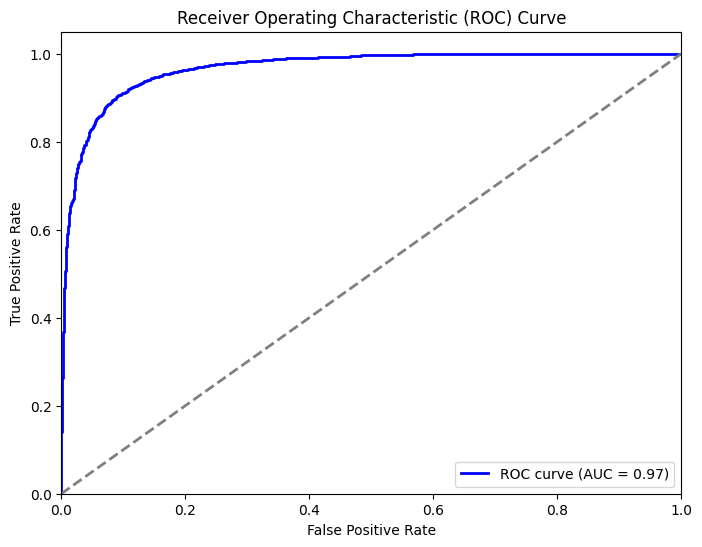

In [ ]:

val_generator.reset()

# Predict using the generator
predictions = model.predict(val_generator, verbose=1)
predictions = predictions.flatten()  # Ensure predictions is a 1D array

# Get true labels from the generator
true_labels = val_generator.labels  # must be 0/1 for binary classification

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predictions)

# Calculate the Area Under the Curve (AUC)
auc_value = roc_auc_score(true_labels, predictions)
print("AUC:", auc_value)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_value)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
test_image_generator = ImageDataGenerator(rescale=1./255)

test_data_gen = test_image_generator.flow_from_directory(
    directory='./test/',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=False,
    class_mode=None,
    batch_size=1
)

Found 12500 images belonging to 1 classes.


In [ ]:
train_generator.class_indices

{'0': 0, '1': 1}

In [ ]:
# Prepare Predictions for Kaggle Submission
test_data_gen.reset()
predictions = model.predict(test_data_gen, verbose=1)
predictions_binary = (predictions > 0.5).astype(int).flatten()



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12500/12500 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step


In [ ]:
# Prepare CSV file for Kaggle Submission

file_paths = test_data_gen.filepaths

# Collect rows into a list
rows = []
for i, path_str in enumerate(file_paths):
    path = Path(path_str)
    img_id = path.stem  # assuming the stem is a numeric string
    label = predictions_binary[i]
    rows.append((img_id, label))

# Sort rows by image id in ascending order (convert image id to int)
rows_sorted = sorted(rows, key=lambda x: int(x[0]), reverse=False)

# Write the sorted rows to CSV
with open('dogs_cat_cnn_results_M1.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['id', 'label'])  # CSV Header
    for row in rows_sorted:
        writer.writerow(row)


In [ ]:
import shutil

# Source file in Google Colab
source_path = "/content/dogs_cat_cnn_results_M1.csv"

# Destination path in Google Drive (inside "My Drive")
dest_path = "/content/drive/My Drive/Colab Notebooks/Model_1_dogs_cat_cnn_results.csv"

try:
    shutil.copy(source_path, dest_path)
    print(f"✅ File saved at: {dest_path}")
except Exception as e:
    print(f"❌ Error saving file: {e}")



✅ File saved at: /content/drive/My Drive/Colab Notebooks/Model_1_dogs_cat_cnn_results.csv


In [ ]:
# Copy the currently running notebook to Google Drive
import shutil
notebook_path = "/content/drive/My Drive/Colab Notebooks/Master 40Ephocs_90_10_Saturday_MSDS_422_Module_8_Assignment_Perez.ipynb"  # Change this if needed
destination_path = "/content/drive/My Drive/Colab Notebooks/Master_422_Module_8_Assignment_Perez.ipynb"

try:
    shutil.copy(notebook_path, destination_path)
    print(f"✅ Notebook auto-saved to: {destination_path}")
except Exception as e:
    print(f"❌ Error saving notebook: {e}")


✅ Notebook auto-saved to: /content/drive/My Drive/Colab Notebooks/Master_422_Module_8_Assignment_Perez.ipynb


<div style="background-color: purple; padding: 15px; border-radius: 5px;">
    <h2 style="text-align: left;">CNN Model 2 - 40 Epochs </h2>
    <p style="text-align: left;">
    </p>
</div>

<div style="background-color: white; padding: 15px; border-radius: 5px;color: black;">
    <h4 style="text-align: left;"> Hyperparameters tuning and Image Normalization</h4>
    <p style="text-align: left;">
    </p>
</div>

In [ ]:
batch_size = 32
epochs = 40
filters = 32
kernel_size = (3, 3)
pool_size = (2, 2)
strides = (1, 1)
padding = 'same'
learning_rate = .0001
dropout_rate = .4

IMG_HEIGHT = 150
IMG_WIDTH = 150

<div style="background-color: white; padding: 15px; border-radius: 5px;color: black;">
    <h4 style="text-align: left;"> Splitting and Augmenting Data</h4>
    <p style="text-align: left;">
    </p>
</div>

In [ ]:
# Train-Validation Split (80-20%)

validation_split = 0.2

train_files, val_files, train_labels, val_labels = train_test_split(
    image_files, labels, test_size=validation_split, stratify=labels, random_state=42
)

# Image Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=10, width_shift_range=0.05,
    height_shift_range=0.05, shear_range=0, zoom_range=0.05,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_files.astype(str), 'class': train_labels.astype(str)}),
    x_col="filename", y_col="class", target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size, class_mode='binary'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': val_files.astype(str), 'class': val_labels.astype(str)}),
    x_col="filename", y_col="class", target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size, class_mode='binary', shuffle=False
)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [ ]:

# Define CNN Model
def create_model():
    model = tensorflow.keras.Sequential([
        tensorflow.keras.layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

        tensorflow.keras.layers.Conv2D(filters, kernel_size, strides=strides, activation='relu', padding = 'same', kernel_regularizer=l2(1e-5)),
        tensorflow.keras.layers.BatchNormalization(),
        tensorflow.keras.layers.MaxPooling2D(pool_size=pool_size),

        tensorflow.keras.layers.Conv2D(filters * 2, kernel_size, strides=strides, activation='relu', padding = 'same', kernel_regularizer=l2(1e-5)),
        tensorflow.keras.layers.BatchNormalization(),
        tensorflow.keras.layers.MaxPooling2D(pool_size=pool_size),

        tensorflow.keras.layers.Conv2D(filters * 4, kernel_size, strides=strides, activation='relu', padding = 'same', kernel_regularizer=l2(1e-5)),
        tensorflow.keras.layers.BatchNormalization(),
        tensorflow.keras.layers.MaxPooling2D(pool_size=pool_size),

        tensorflow.keras.layers.Flatten(),
        tensorflow.keras.layers.Dense(filters * 4, activation='relu'),
        tensorflow.keras.layers.Dropout(dropout_rate),

        tensorflow.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tensorflow.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

start_time = time.time()

# Train Initial Model
model = create_model()

early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

history = model.fit(
    train_generator, epochs=epochs, validation_data=val_generator,
    callbacks=[early_stop, lr_scheduler]
)

# Print Final Results
print("\n📊 Best Validation Accuracy:", max(history.history['val_accuracy']))

end_time = time.time()
print(f"SGD 2L 10N Processing Time: {end_time - start_time:.2f} seconds")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 118s 180ms/step - accuracy: 0.6490 - loss: 0.6929 - val_accuracy: 0.7264 - val_loss: 0.5588 - learning_rate: 1.0000e-04
Epoch 2/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 112s 179ms/step - accuracy: 0.7605 - loss: 0.4952 - val_accuracy: 0.8050 - val_loss: 0.4418 - learning_rate: 1.0000e-04
Epoch 3/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 111s 178ms/step - accuracy: 0.7882 - loss: 0.4457 - val_accuracy: 0.8076 - val_loss: 0.4256 - learning_rate: 1.0000e-04
Epoch 4/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 114s 183ms/step - accuracy: 0.8093 - loss: 0.4226 - val_accuracy: 0.8116 - val_loss: 0.4238 - learning_rate: 1.0000e-04
Epoch 5/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 113s 181ms/step - accuracy: 0.8224 - loss: 0.3938 - val_accuracy: 0.8280 - val_loss: 0.3886 - learning_rate: 1.0000e-04
Epoch 6/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 114s 182ms/step - accuracy: 0.8267 - loss: 0.3865 - val_accuracy: 0.8296 - val_loss: 0.3853 - learning_rate: 1.0000e-04
Epoch 7/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 37, 37, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       5,308,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,207,557 (61.83 MB)

 Trainable params: 5,402,369 (20.61 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 10,804,740 (41.22 MB)

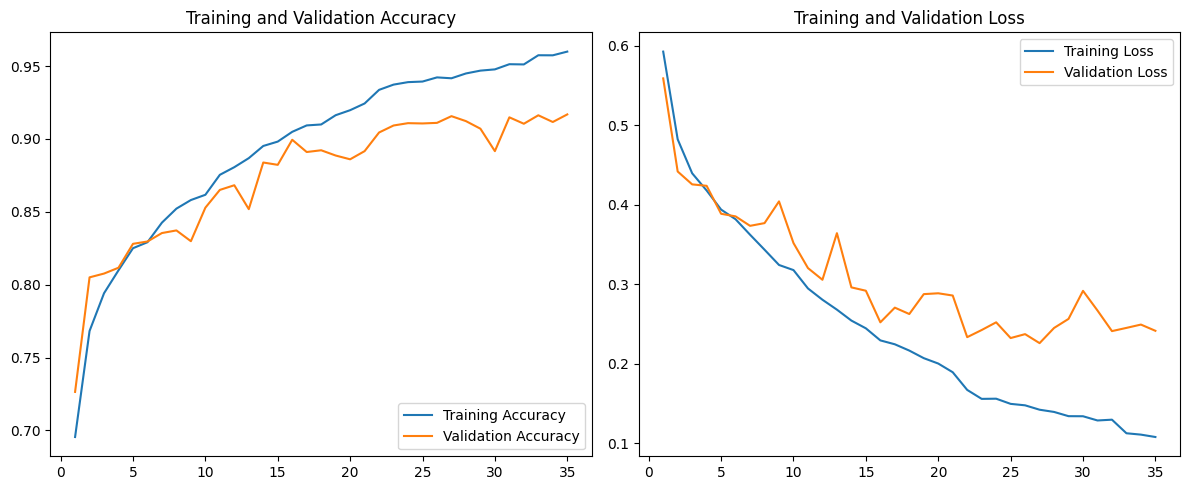

In [ ]:
# Extract metrics from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Determine how many epochs actually ran (e.g., if EarlyStopping halted early)
actual_epochs = len(acc)

# Create a matching range for the x-axis
epochs_range = range(1, actual_epochs + 1)

# Plot
plt.figure(figsize=(12, 5))

# Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()


157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step
Confusion Matrix:
[[2267  233]
 [ 189 2311]]
Classification Report:
              precision    recall  f1-score   support

         Cat       0.92      0.91      0.91      2500
         Dog       0.91      0.92      0.92      2500

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000



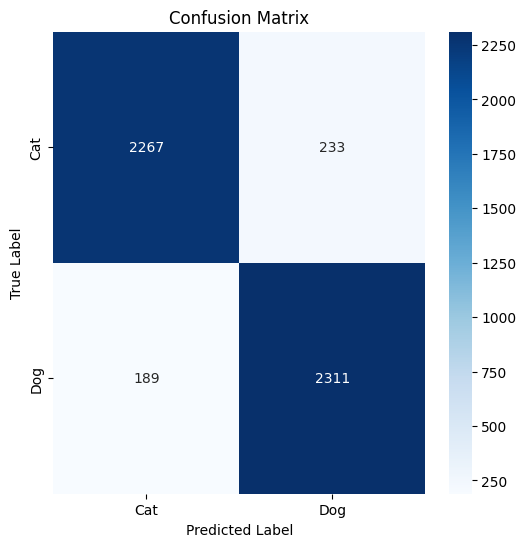

In [ ]:
# Reset the validation generator to ensure we start from the first batch
val_generator.reset()

# Generate predictions on the validation set
# For binary classification, predictions will be probabilities (e.g., between 0 and 1)
predictions = model.predict(val_generator, verbose=1)
# Convert probabilities to binary labels (0 or 1)
predictions_binary = (predictions > 0.5).astype(int).flatten()

# Get the true labels from the validation generator
# For flow_from_dataframe, the labels are stored in val_generator.labels
true_labels = val_generator.labels

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predictions_binary)
print("Confusion Matrix:")
print(cm)

# Print the classification report for precision, recall, and F1-score
report = classification_report(true_labels, predictions_binary, target_names=['Cat', 'Dog'])
print("Classification Report:")
print(report)

# Optional: Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step
AUC: 0.9721424000000001


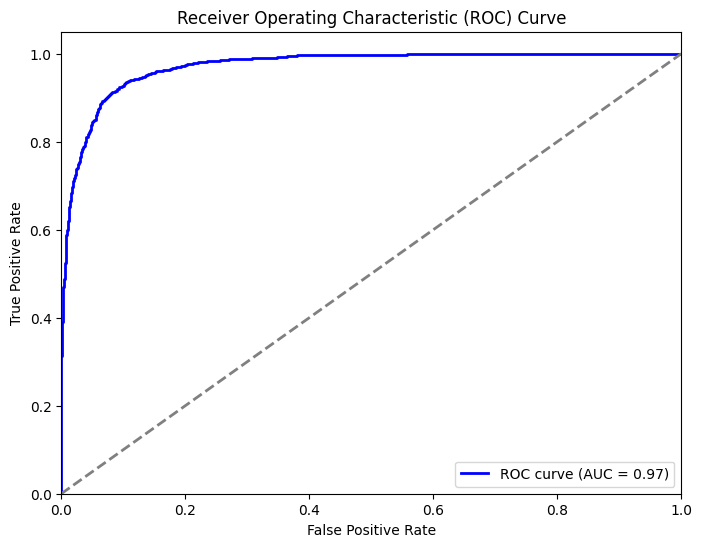

In [ ]:

val_generator.reset()

# Predict using the generator
predictions = model.predict(val_generator, verbose=1)
predictions = predictions.flatten()  # Ensure predictions is a 1D array

# Get true labels from the generator
true_labels = val_generator.labels  # must be 0/1 for binary classification

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predictions)

# Calculate the Area Under the Curve (AUC)
auc_value = roc_auc_score(true_labels, predictions)
print("AUC:", auc_value)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_value)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
test_image_generator = ImageDataGenerator(rescale=1./255)

test_data_gen = test_image_generator.flow_from_directory(
    directory='./test/',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=False,
    class_mode=None,
    batch_size=1
)

Found 12500 images belonging to 1 classes.


In [ ]:
train_generator.class_indices

{'0': 0, '1': 1}

In [ ]:
# Prepare Predictions for Kaggle Submission
test_data_gen.reset()
predictions = model.predict(test_data_gen, verbose=1)
predictions_binary = (predictions > 0.5).astype(int).flatten()



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12500/12500 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step


In [ ]:
# Prepare CSV file for Kaggle Submission

file_paths = test_data_gen.filepaths

# Collect rows into a list
rows = []
for i, path_str in enumerate(file_paths):
    path = Path(path_str)
    img_id = path.stem  # assuming the stem is a numeric string
    label = predictions_binary[i]
    rows.append((img_id, label))

# Sort rows by image id in ascending order (convert image id to int)
rows_sorted = sorted(rows, key=lambda x: int(x[0]), reverse=False)

# Write the sorted rows to CSV
with open('dogs_cat_cnn_results_M1.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['id', 'label'])  # CSV Header
    for row in rows_sorted:
        writer.writerow(row)


In [ ]:
import shutil

# Source file in Google Colab
source_path = "/content/dogs_cat_cnn_results_M1.csv"

# Destination path in Google Drive (inside "My Drive")
dest_path = "/content/drive/My Drive/Colab Notebooks/Model_2_dogs_cat_cnn_results.csv"

try:
    shutil.copy(source_path, dest_path)
    print(f"✅ File saved at: {dest_path}")
except Exception as e:
    print(f"❌ Error saving file: {e}")



✅ File saved at: /content/drive/My Drive/Colab Notebooks/Model_2_dogs_cat_cnn_results.csv


In [ ]:
# Copy the currently running notebook to Google Drive
import shutil
notebook_path = "/content/drive/My Drive/Colab Notebooks/Master 40Ephocs_90_10_Saturday_MSDS_422_Module_8_Assignment_Perez.ipynb"  # Change this if needed
destination_path = "/content/drive/My Drive/Colab Notebooks/Master_422_Module_8_Assignment_Perez.ipynb"

try:
    shutil.copy(notebook_path, destination_path)
    print(f"✅ Notebook auto-saved to: {destination_path}")
except Exception as e:
    print(f"❌ Error saving notebook: {e}")


✅ Notebook auto-saved to: /content/drive/My Drive/Colab Notebooks/Master_422_Module_8_Assignment_Perez.ipynb


<div style="background-color: purple; padding: 15px; border-radius: 5px;">
    <h2 style="text-align: left;">CNN Model 3 - 60 Epochs, Image Size Changed 224 x 224 </h2>
    <p style="text-align: left;">
    </p>
</div>

<div style="background-color: white; padding: 15px; border-radius: 5px;color: black;">
    <h4 style="text-align: left;"> Hyperparameters tuning and Image Normalization</h4>
    <p style="text-align: left;">
    </p>
</div>

In [ ]:
batch_size = 32
epochs = 60
filters = 32
kernel_size = (3, 3)
pool_size = (2, 2)
strides = (1, 1)
padding = 'same'
learning_rate = .0001
dropout_rate = .4

IMG_HEIGHT = 224
IMG_WIDTH = 224

<div style="background-color: white; padding: 15px; border-radius: 5px;color: black;">
    <h4 style="text-align: left;"> Splitting and Augmenting Data</h4>
    <p style="text-align: left;">
    </p>
</div>

In [ ]:
# Train-Validation Split (80-20%)

validation_split = 0.2

train_files, val_files, train_labels, val_labels = train_test_split(
    image_files, labels, test_size=validation_split, stratify=labels, random_state=42
)

# Image Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=10, width_shift_range=0.05,
    height_shift_range=0.05, shear_range=0, zoom_range=0.05,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_files.astype(str), 'class': train_labels.astype(str)}),
    x_col="filename", y_col="class", target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size, class_mode='binary'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': val_files.astype(str), 'class': val_labels.astype(str)}),
    x_col="filename", y_col="class", target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size, class_mode='binary', shuffle=False
)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [ ]:

# Define CNN Model
def create_model():
    model = tensorflow.keras.Sequential([
        tensorflow.keras.layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

        tensorflow.keras.layers.Conv2D(filters, kernel_size, strides=strides, activation='relu', padding = 'same', kernel_regularizer=l2(1e-5)),
        tensorflow.keras.layers.BatchNormalization(),
        tensorflow.keras.layers.MaxPooling2D(pool_size=pool_size),

        tensorflow.keras.layers.Conv2D(filters * 2, kernel_size, strides=strides, activation='relu', padding = 'same', kernel_regularizer=l2(1e-5)),
        tensorflow.keras.layers.BatchNormalization(),
        tensorflow.keras.layers.MaxPooling2D(pool_size=pool_size),

        tensorflow.keras.layers.Conv2D(filters * 4, kernel_size, strides=strides, activation='relu', padding = 'same', kernel_regularizer=l2(1e-5)),
        tensorflow.keras.layers.BatchNormalization(),
        tensorflow.keras.layers.MaxPooling2D(pool_size=pool_size),

        tensorflow.keras.layers.Flatten(),
        tensorflow.keras.layers.Dense(filters * 4, activation='relu'),
        tensorflow.keras.layers.Dropout(dropout_rate),

        tensorflow.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tensorflow.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

start_time = time.time()

# Train Initial Model
model = create_model()

early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

history = model.fit(
    train_generator, epochs=epochs, validation_data=val_generator,
    callbacks=[early_stop, lr_scheduler]
)

# Print Final Results
print("\n📊 Best Validation Accuracy:", max(history.history['val_accuracy']))

end_time = time.time()
print(f"SGD 2L 10N Processing Time: {end_time - start_time:.2f} seconds")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 218s 336ms/step - accuracy: 0.6453 - loss: 0.8008 - val_accuracy: 0.7144 - val_loss: 0.5575 - learning_rate: 1.0000e-04
Epoch 2/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 206s 330ms/step - accuracy: 0.7404 - loss: 0.5276 - val_accuracy: 0.7862 - val_loss: 0.4686 - learning_rate: 1.0000e-04
Epoch 3/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 209s 334ms/step - accuracy: 0.7792 - loss: 0.4663 - val_accuracy: 0.7800 - val_loss: 0.4613 - learning_rate: 1.0000e-04
Epoch 4/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 208s 332ms/step - accuracy: 0.7874 - loss: 0.4505 - val_accuracy: 0.7998 - val_loss: 0.4324 - learning_rate: 1.0000e-04
Epoch 5/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 211s 338ms/step - accuracy: 0.8093 - loss: 0.4226 - val_accuracy: 0.8180 - val_loss: 0.4094 - learning_rate: 1.0000e-04
Epoch 6/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 208s 332ms/step - accuracy: 0.8138 - loss: 0.4092 - val_accuracy: 0.8152 - val_loss: 0.4033 - learning_rate: 1.0000e-04
Epoch 7/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,817,477 (148.08 MB)

 Trainable params: 12,939,009 (49.36 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 25,878,020 (98.72 MB)

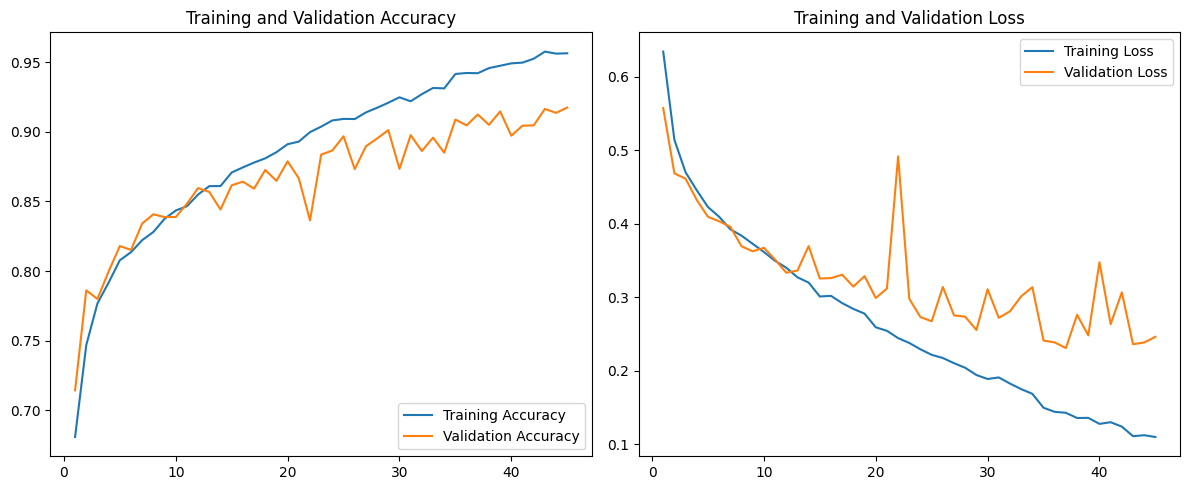

In [ ]:
# Extract metrics from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Determine how many epochs actually ran (e.g., if EarlyStopping halted early)
actual_epochs = len(acc)

# Create a matching range for the x-axis
epochs_range = range(1, actual_epochs + 1)

# Plot
plt.figure(figsize=(12, 5))

# Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()


157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step
Confusion Matrix:
[[2210  290]
 [ 148 2352]]
Classification Report:
              precision    recall  f1-score   support

         Cat       0.94      0.88      0.91      2500
         Dog       0.89      0.94      0.91      2500

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000



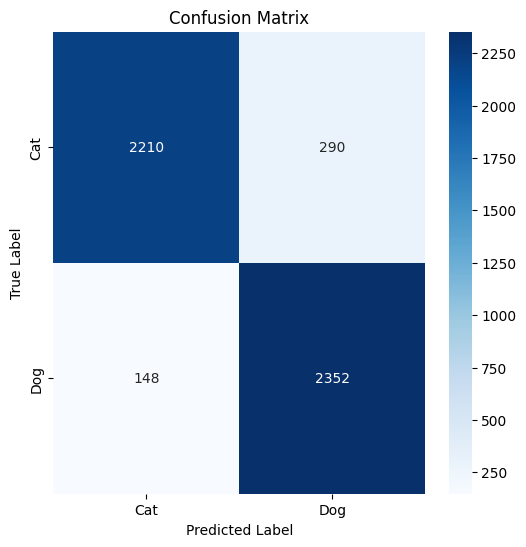

In [ ]:
# Reset the validation generator to ensure we start from the first batch
val_generator.reset()

# Generate predictions on the validation set
# For binary classification, predictions will be probabilities (e.g., between 0 and 1)
predictions = model.predict(val_generator, verbose=1)
# Convert probabilities to binary labels (0 or 1)
predictions_binary = (predictions > 0.5).astype(int).flatten()

# Get the true labels from the validation generator
# For flow_from_dataframe, the labels are stored in val_generator.labels
true_labels = val_generator.labels

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predictions_binary)
print("Confusion Matrix:")
print(cm)

# Print the classification report for precision, recall, and F1-score
report = classification_report(true_labels, predictions_binary, target_names=['Cat', 'Dog'])
print("Classification Report:")
print(report)

# Optional: Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step
AUC: 0.97306864


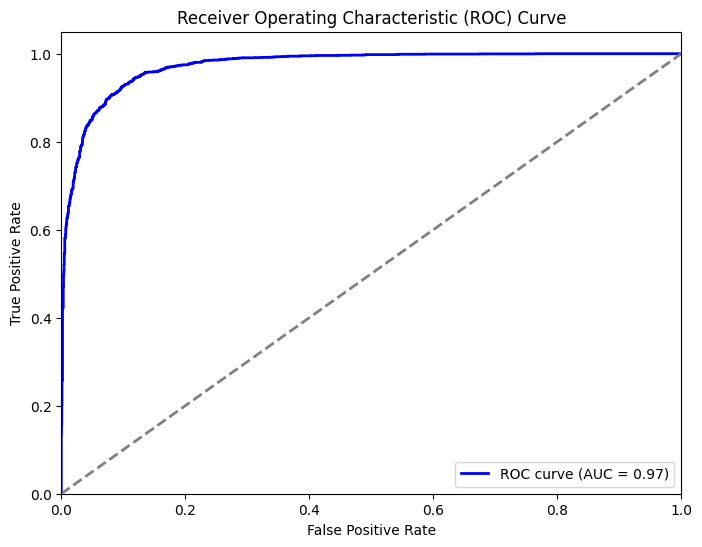

In [ ]:

val_generator.reset()

# Predict using the generator
predictions = model.predict(val_generator, verbose=1)
predictions = predictions.flatten()  # Ensure predictions is a 1D array

# Get true labels from the generator
true_labels = val_generator.labels  # must be 0/1 for binary classification

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predictions)

# Calculate the Area Under the Curve (AUC)
auc_value = roc_auc_score(true_labels, predictions)
print("AUC:", auc_value)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_value)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
test_image_generator = ImageDataGenerator(rescale=1./255)

test_data_gen = test_image_generator.flow_from_directory(
    directory='./test/',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=False,
    class_mode=None,
    batch_size=1
)

Found 12500 images belonging to 1 classes.


In [ ]:
train_generator.class_indices

{'0': 0, '1': 1}

In [ ]:
# Prepare Predictions for Kaggle Submission
test_data_gen.reset()
predictions = model.predict(test_data_gen, verbose=1)
predictions_binary = (predictions > 0.5).astype(int).flatten()



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 7212/12500 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step

In [ ]:
# Prepare CSV file for Kaggle Submission

file_paths = test_data_gen.filepaths

# Collect rows into a list
rows = []
for i, path_str in enumerate(file_paths):
    path = Path(path_str)
    img_id = path.stem  # assuming the stem is a numeric string
    label = predictions_binary[i]
    rows.append((img_id, label))

# Sort rows by image id in ascending order (convert image id to int)
rows_sorted = sorted(rows, key=lambda x: int(x[0]), reverse=False)

# Write the sorted rows to CSV
with open('dogs_cat_cnn_results_M1.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['id', 'label'])  # CSV Header
    for row in rows_sorted:
        writer.writerow(row)


In [ ]:
import shutil

# Source file in Google Colab
source_path = "/content/dogs_cat_cnn_results_M1.csv"

# Destination path in Google Drive (inside "My Drive")
dest_path = "/content/drive/My Drive/Colab Notebooks/Model_3_dogs_cat_cnn_results.csv"

try:
    shutil.copy(source_path, dest_path)
    print(f"✅ File saved at: {dest_path}")
except Exception as e:
    print(f"❌ Error saving file: {e}")



In [ ]:
# Copy the currently running notebook to Google Drive
import shutil
notebook_path = "/content/drive/My Drive/Colab Notebooks/Master 40Ephocs_90_10_Saturday_MSDS_422_Module_8_Assignment_Perez.ipynb"  # Change this if needed
destination_path = "/content/drive/My Drive/Colab Notebooks/Master_422_Module_8_Assignment_Perez.ipynb"

try:
    shutil.copy(notebook_path, destination_path)
    print(f"✅ Notebook auto-saved to: {destination_path}")
except Exception as e:
    print(f"❌ Error saving notebook: {e}")
